# How to use `darksirens`

This notebook demonstrates how to generate mock gravitational wave luminosity distance catalogues from astrophysical black hole (ABH) and primordial black hole (PBH) mergers using the `darksirens` package.

In [1]:
# import relevant packages
import sys
sys.path.append('../..')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

# import the mock maker
from darksirens.mock_maker import compute_GWmock

# plot settings
rc('text', usetex=True)
rc('font', family='serif')
matplotlib.rcParams.update({'font.size': 18})

# Input parameters

All the parameters specifiying each aspect of the mock generation are passed to the code as dictionaries. The dictionaries are:
- `cosmopars`: this specifies the values of the cosmological parameters
- `specs`: this controls the experimental setting and mock making options
- `ABHpars`: settings for the events with astrophysical black hole progenitors
- `PBHpars`: settings for the events with primordial black hole progenitors
- `progenitor`: this determines the type of binary systems responsible for the events in the mock catalogue

## Cosmology

At the time of the first release (April 2022), the code only works in a flat-$\Lambda$CDM cosmology. Thus, the only parameters that we need to specify are
- `Omega_m`: the total matter density parameter $\Omega_m$
- `H0`: the Hubble parameter at $z=0$

Note that in the current version of the code, the properties of lensing
have been computed for $H_0=67.4$ km/s/Mpc, $\Omega_m=0.315$ and $\Omega_b=0.05$. For
different values you may have to run the notebook "variance_convergence.ipynb"
and substitute the new fitting function for sigma_kappa in "lensing.py".

In [2]:
cosmopars = {'Omega_m': 0.315,
             'H0': 67.4}

## Specifications

These control the experimental settings and different options that the code uses to generate the mock data.
- `survey`: specifies the GW observatory the mock will be created for. **Currently only the Einstein Telescope is available**.
- `z_min`: minimum redshift used to generate events
- `z_max`: maximum redshift used to generate events
- `Tobs`: length of the observing run in years
- `SNR_min`: minimum signal-to-noise ratio (SNR) that an event needs to have to be accounted for as "observed". Events with an SNR smaller than this number are discarded from the final mock catalogue
- `Ngw`: number of events. This option is ignored when mock data are generated, as the total number of events is computed out of the previous options. This is instead required when using the "testing" option for the progenitor, which allows to customize the number of events (see below)
- `include_lensing`: if set to True, the code accounts for lensing magnification effects both in the calculation of the SNR and in the final event's luminosity distance $d_L$
- `data_spread`: if set to True, the code will use as observed distances a luminosity extracted from a Gaussian distribution centered in $d_L$ with it's $\sigma$ given by the observational error

In [3]:
specs = {'survey': 'ET-D',
         'z_min': 0.001, 
         'z_max': 100,
         'Tobs': 1,
         'SNR_min': 8,
         'Ngw': 1000,
         'include_lensing': False,
         'data_spread': False}

## ABH parameters

These control the settings for ABH-ABH mergers.
- `ABHmass`: the mass of a single black hole in a given binary system. We consider a monochromatic mass function so every black hole will always have the same mass
- `z_m, a, b`: parameters controlling the merger rate function for ABH

In [4]:
ABHpars = {'ABHmass': 7,
           'z_m': 2.,
           'a': 2.37,
           'b': 1.8}

## PBH parameters

These control the settings for PBH-PBH mergers
- `PBHmass`: the mass of a single black hole in a given binary system. We consider a monochromatic mass function so every black hole will always have the same mass
- `clustering`: if set to 'yes', the effect of late-time clustering on the PBH merger rate is included
- `fPBH`: fraction of dark matter that is made up of primordial black holes **(Warning: safe range is $f_{\rm PBH}\in\left[10^{-9}-10^{-3}\right]$)**

In [5]:
PBHpars = {'PBHmass': 10,
           'clustering': 'yes',
           'fPBH': 1.e-5}

## Progenitor

This controls which kind of progenitor binaries are considered when generating the mock data. Possible options are
- `ABH-ABH`: only includes ABH binaries
- `PBH-PBH`: only includes PBH binaries
- `mixed`: includes both ABH and PBH binaries, with their relative number controlled by $f_{\rm PBH}$
- `testing`: used for testing purposes. Only uses ABH options and the number of events is directly selected by the user

In [6]:
progenitor = 'mixed'

# Section 1: generate a mock dataset

The main interface of the code allows us to generate a dataset for the selected events using the specifications chosen above. 

In order to generate the mock it is enough to initialise the `compute_GWmock` class of the code, which then executes all the relevant parts of the code automatically.

This class has an optional argument `outpath`. By default this is set to None. If a path is specified here, the code will save the mock data generated to a file at the path you specify.

In [7]:
data = compute_GWmock(cosmopars, progenitor, ABHpars, PBHpars, specs)


Initialising mock maker...

Computing number of events...
...N_ABH (expected)     = 24108.17283432582
...N_ABH (observed)     = 24148
...N_PBH (expected)     = 31.680642400214907
...N_PBH (observed)     = 35
...N_TOT     = 24183
...PBH ratio = 0.0014472976884588348
CREATING EVENTS
...doing PBHs


100%|██████████| 35/35 [00:00<00:00, 6151.81it/s]


...doing ABHs


100%|██████████| 24148/24148 [00:02<00:00, 10144.00it/s]


Done events!
COMPUTING NOISE
Producing mock catalogue of 24183 events.


100%|██████████| 24183/24183 [00:01<00:00, 20133.63it/s]


Mock catalogue created in 0.03 minutes.

Total events after SNR cut: 20780


## Main output

The final product of this mock maker is the mock instance of the `compute_GWmock` class, which contains several properties for the events generated. 

In [8]:
print('Mock data available properties:')
for key in data.mock:
    print(key)

Mock data available properties:
z
dL
intrinsic_error
lensing_error
dL_error
dL_unlensed
SNR
progenitor


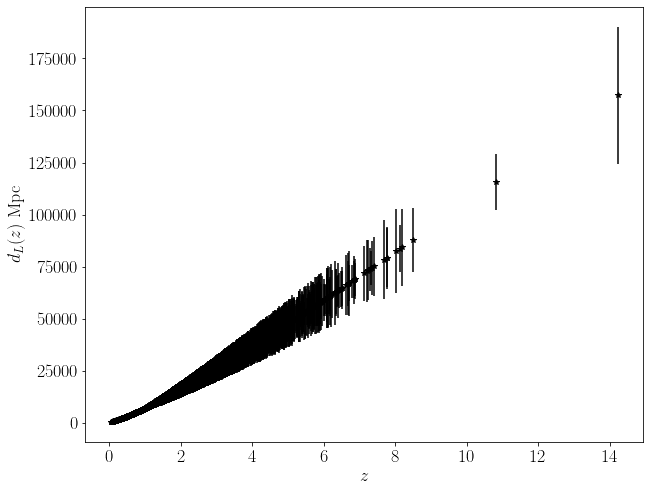

In [9]:
# plot the generated GW luminosity distances and their errors
plt.figure(figsize = (10, 8))
plt.errorbar(data.mock['z'], data.mock['dL'], yerr = data.mock['dL_error'], 
             ls = '', marker = '*', color = 'black')
plt.xlabel(r'$z$')
plt.ylabel(r'$d_L(z)$ Mpc');

## Additional output

The code also allows us to access the "uncut mock", i.e. the one no events have been removed by an SNR cut. This allows us to check the cut is working properly.

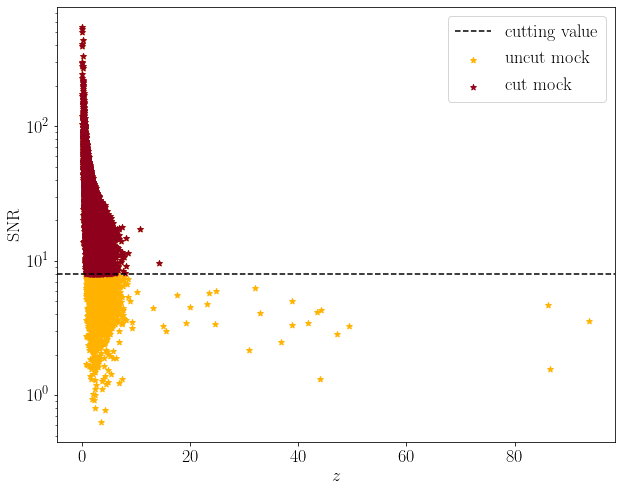

In [10]:
plt.figure(figsize = (10, 8))
plt.scatter(data.uncut_mock['z'], data.uncut_mock['SNR'], 
            marker = '*', color = '#FFB300', label = 'uncut mock')
plt.scatter(data.mock['z'], data.mock['SNR'],
            marker = '*', color = '#8E001C', label = 'cut mock')
plt.axhline(y = specs['SNR_min'], label = 'cutting value', ls = '--', color = 'black')
plt.legend(loc = 'upper right')
plt.yscale('log')
plt.xlabel(r'$z$')
plt.ylabel(r'SNR');

# Section 2: A deeper look into the code

We can examine in more detail the different parts of the code used to create the mock.

Note: the cells in section 2 must be executed in order, as they follow the logic of the code.

## Cosmology

The code is interfaced with the Boltzmann solver `CAMB` to obtain cosmological predictions given the chosen cosmological parameters. The `darksirens` code allows us to access the interpolators in redshift for the Hubble parameter $H(z)$, the luminosity distance $d_L(z)$ and the comoving distance $r(z)$.

In [11]:
from cosmology.cosmo import Cosmology

cosmo = Cosmology(cosmopars)

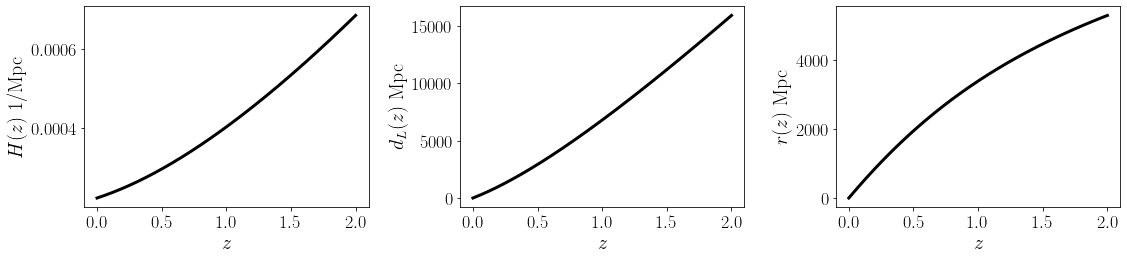

In [12]:
zplot = np.linspace(0, 2, 1000)

f, ax = plt.subplots(1, 3, figsize = (16, 4), sharex = False, sharey = False)

ax[0].plot(zplot, cosmo.functions['Hubble'](zplot),lw = 3, color = 'black')
ax[0].set_xlabel(r'$z$', fontsize = 20)
ax[0].set_ylabel(r'$H(z)$ 1/Mpc', fontsize = 20)

ax[1].plot(zplot, cosmo.functions['luminosity_distance'](zplot), lw = 3, color = 'black')
ax[1].set_xlabel(r'$z$',fontsize = 20)
ax[1].set_ylabel(r'$d_L(z)$ Mpc', fontsize = 20)

ax[2].plot(zplot, cosmo.functions['comoving_distance'](zplot), lw = 3, color = 'black')
ax[2].set_xlabel(r'$z$',fontsize = 20)
ax[2].set_ylabel(r'$r(z)$ Mpc', fontsize = 20)

f.tight_layout()
plt.show()

## Wave properties

The code is interfaced with `PyCBC` to obtain the waveform of the GW event given the mass and redshift of the progenitor.

In [13]:
from wavemodelling.waves import wave_properties
wave = wave_properties()

z_test = 0.001
m_test = 10

frequency, waveform = wave.get_waveform(m1 = m_test, m2 = m_test,
                                        distance = cosmo.functions['luminosity_distance'](z_test))

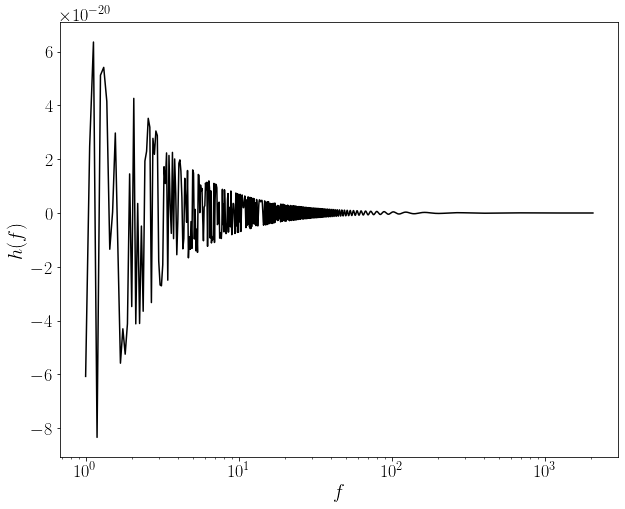

In [14]:
plt.figure(figsize = (10,8))
plt.plot(frequency, np.real(waveform), color = 'black')
plt.xlabel(r'$f$', fontsize = 20)
plt.ylabel(r'$h(f)$', fontsize = 20),
plt.xscale('log');

## Merger rates and probabilities

Once the parameters for ABH and PBH are specified, the code computes the merger rates in redshift for the two binary progenitors. The merger rates are obtained when the `event_generator` class is initialised. The results can depend on the choice of the merger rate parameters.

Once the merger rate is obtained, this is used to obtain the redshift probability of the events as

\begin{equation}
P(z) \propto \frac{4\pi r^2(z) R(z)}{H(z)(1+z)}.
\end{equation}

In [15]:
from events.createevent import event_generator 

event              = event_generator(cosmo, ABHpars, PBHpars, 'ABH-ABH', specs)
ABH_baseline_rate  = event.ABHrate
ABH_baseline_probz = event.ABHprob

event              = event_generator(cosmo, ABHpars, PBHpars, 'PBH-PBH', specs)
PBH_baseline_rate  = event.PBHrate
PBH_baseline_probz = event.PBHprob


ABHpars['z_m'] = 1.72
ABHpars['a']   = 2.8
ABHpars['b']   = 2.46
event          = event_generator(cosmo, ABHpars, PBHpars, 'ABH-ABH', specs)
ABH_GRB_rate   = event.ABHrate
ABH_GRB_probz  = event.ABHprob



PBHpars['clustering']  = 'no'
event                  = event_generator(cosmo, ABHpars, PBHpars, 'PBH-PBH', specs)
PBH_noclustering_rate  = event.PBHrate 
PBH_noclustering_probz = event.PBHprob

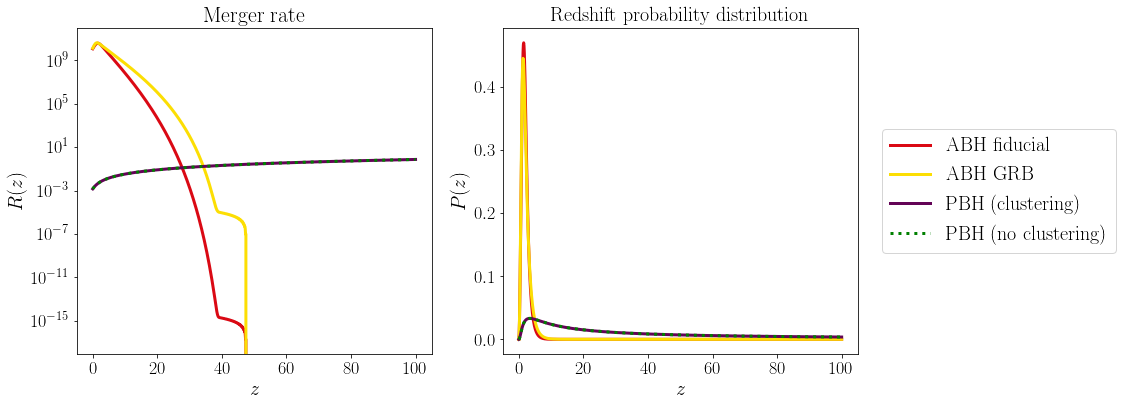

In [16]:
# plot the merger rates
zplot = np.linspace(specs['z_min'], specs['z_max'], 1000)

f, ax = plt.subplots(1, 2, figsize = (14, 6), sharex = False, sharey = False)

ax[0].set_title('Merger rate')
ax[0].plot(zplot, ABH_baseline_rate, label = 'ABH fiducial', lw = 3 ,color = '#da0914', ls = '-')
ax[0].plot(zplot, ABH_GRB_rate, label = 'ABH GRB', lw = 3,color='#fcde03', ls =  '-')
ax[0].plot(zplot, PBH_baseline_rate, label = 'PBH (clustering)', lw = 3, color = '#630356',ls = '-')
ax[0].plot(zplot, PBH_noclustering_rate, label = 'PBH (no clustering)', lw = 3, color = 'green', ls = ':')
ax[0].set_xlabel(r'$z$', fontsize = 20)
ax[0].set_ylabel(r'$R(z)$', fontsize = 20)
ax[0].set_yscale('log')

# plot the redshift probability distribution
ax[1].set_title('Redshift probability distribution',fontsize=20)
ax[1].plot(zplot, ABH_baseline_probz(zplot), label = 'ABH fiducial', lw = 3, color = '#da0914', ls = '-')
ax[1].plot(zplot, ABH_GRB_probz(zplot), label = 'ABH GRB', lw = 3, color = '#fcde03', ls = '-')
ax[1].plot(zplot, PBH_baseline_probz(zplot), label = 'PBH (clustering)', lw = 3, color = '#630356', ls = '-')
ax[1].plot(zplot, PBH_noclustering_probz(zplot), label = 'PBH (no clustering)', lw = 3, color = 'green', ls = ':')
ax[1].set_xlabel(r'$z$',fontsize = 20)
ax[1].set_ylabel(r'$P(z)$',fontsize = 20)

plt.legend(bbox_to_anchor = (1.04,0.5), loc = 'center left', fontsize = 20)

## Get the properties of single event

The event generator class also allows us to draw the properties of a single event.

In [17]:
ABHpars = {'ABHmass': 7,
           'z_m': 2.,
           'a': 2.37,
           'b': 1.8}

PBHpars = {'PBHmass': 10,
           'clustering': 'yes',
           'fPBH': 1.e-4}

progenitor = 'mixed'

event = event_generator(cosmo,ABHpars,PBHpars,progenitor,specs)


single_ABH = event.get_single_event('ABH-ABH')
single_PBH = event.get_single_event('PBH-PBH')

print('----------Astrophysical BH merger----------')
for key in single_ABH:
    print(key+' = '+str(single_ABH[key]))
print('')
print('------------Primordial BH merger-----------')
for key in single_PBH:
    print(key+' = '+str(single_PBH[key]))

----------Astrophysical BH merger----------
progenitor = ABH-ABH
z_reference = 0.001
frequency = [1.000000e+00 1.125000e+00 1.250000e+00 ... 4.095750e+03 4.095875e+03
 4.096000e+03]
waveform = [ 4.85095702e-20+6.21636088e-20j -3.36612528e-20+5.99009576e-20j
  5.29522621e-20-2.97751816e-20j ...  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
redshift = 2.517999702728877

------------Primordial BH merger-----------
progenitor = PBH-PBH
z_reference = 0.001
frequency = [1.0000000e+00 1.0625000e+00 1.1250000e+00 ... 2.0478750e+03 2.0479375e+03
 2.0480000e+03]
waveform = [-6.07314244e-20-8.69507267e-20j  2.47216980e-20+9.56596518e-20j
  6.35444112e-20+6.71013753e-20j ...  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
redshift = 70.52263170104347


## Number of events

The code contains a module `numberofevents` that allows us to contribute the number of events in the observed volume, given the survey specifications and the merger rates, and the fraction of this which comes from PBH-PBH mergers.

In [18]:
from events.numberofevents import event_number_calculator

Ncalc = event_number_calculator(cosmo,ABHpars,PBHpars,specs)

print('')
print('Computing number of events...')
Nabh_exp  = Ncalc.NABHeventscalculator(ABHpars, cosmo, specs['z_max'], specs['Tobs'])
print('...N_ABH (expected)     = {}'.format(Nabh_exp))
Nabh = np.random.poisson(Nabh_exp)
print('...N_ABH (observed)     = {}'.format(Nabh))

Npbh_exp  = Ncalc.NPBHeventscalculator(PBHpars, cosmo, specs['z_max'], specs['Tobs'])
print('...N_PBH (expected)     = {}'.format(Npbh_exp))
Npbh = np.random.poisson(Npbh_exp)
print('...N_PBH (observed)     = {}'.format(Npbh))

Ntot     = Nabh+Npbh
PBHratio = Npbh/Ntot
print('...N_TOT     = {}'.format(Ntot))
print('...PBH ratio = {}'.format(PBHratio))


Computing number of events...
...N_ABH (expected)     = 23920.407887539477
...N_ABH (observed)     = 23848
...N_PBH (expected)     = 3167.609411087598
...N_PBH (observed)     = 3136
...N_TOT     = 26984
...PBH ratio = 0.11621701749184703


# Section 3: validation tests

This section contains some results produced to validate our pipeline.

## Observable events vs redshift

While the main pipeline computes the total number of expected events, the SNR of each and cuts out the events below the limit, another calculation for the observed number of events is available.

### Dependency on the progenitor mass

In [19]:
import pandas as pd

from events.numberofevents import event_number_calculator
from mock_maker import compute_GWmock

specs = {'survey': 'ET-D',
         'z_min': 0.001, 
         'z_max': 100,
         'Tobs': 1,
         'SNR_min': 8,
         'include_lensing': False,
         'data_spread': False}

cosmopars = {'Omega_m': 0.32,
             'H0': 67.}

ABHpars = {'ABHmass': 7,
           'z_m': 2.,
           'a': 2.37,
           'b': 1.8}

PBHpars = {'PBHmass': 10,
           'fPBH': 1.e-5,
           'clustering': 'yes'}

progenitor = 'testing' 
    
specs['Ngw'] = 100000
    
cosmo = Cosmology(cosmopars)

mass_vec = np.linspace(10,30,3)
colors   = ['#009B3A','#FED100','#000000']

nbins     = 50
zbins     = np.linspace(0.1, 100, nbins)
midbins   = [(a+b)/2 for a, b in zip(zbins[:-1],zbins[1:])]

In [20]:
internal_method = []
for m in mass_vec:
    M_tot     = m+m
    Ncalc     = event_number_calculator(cosmo, ABHpars, PBHpars, specs)
    th_ratios = Ncalc.detection_ratio_of_Mtot_z_ET(M_tot, midbins)
    internal_method.append(th_ratios)

In [21]:
lensed_results = []

specs['include_lensing'] = True

for m in mass_vec:
    ABHpars['ABHmass'] = m
    data = compute_GWmock(cosmopars,progenitor,ABHpars,PBHpars,specs)
    test_mock_df    = pd.DataFrame(data.uncut_mock)
    test_cut_df     = test_mock_df[test_mock_df.SNR > specs['SNR_min']]
    test_obs_ratios = (test_cut_df['z'].value_counts(bins=zbins, sort=False)/
                       test_mock_df['z'].value_counts(bins=zbins, sort=False))
        
    lensed_results.append(test_obs_ratios)


Initialising mock maker...
Using testing case. N_tot = 100000
CREATING EVENTS
COMPUTING NOISE
have been computed for H0=67.4[km/s/Mpc], Omega_m=0.315 and Omega_b=0.05. For
different values you may have to run the notebook "variance_convergence.ipynb"
and substitute the new fitting function for sigma_kappa in "lensing.py".
Producing mock catalogue of 100000 events.


100%|██████████| 100000/100000 [00:14<00:00, 6822.16it/s]


Mock catalogue created in 0.26 minutes.

Total events after SNR cut: 13762

Initialising mock maker...
Using testing case. N_tot = 100000
CREATING EVENTS
COMPUTING NOISE
have been computed for H0=67.4[km/s/Mpc], Omega_m=0.315 and Omega_b=0.05. For
different values you may have to run the notebook "variance_convergence.ipynb"
and substitute the new fitting function for sigma_kappa in "lensing.py".
Producing mock catalogue of 100000 events.


100%|██████████| 100000/100000 [00:14<00:00, 7084.93it/s]


Mock catalogue created in 0.25 minutes.

Total events after SNR cut: 28276

Initialising mock maker...
Using testing case. N_tot = 100000
CREATING EVENTS
COMPUTING NOISE
have been computed for H0=67.4[km/s/Mpc], Omega_m=0.315 and Omega_b=0.05. For
different values you may have to run the notebook "variance_convergence.ipynb"
and substitute the new fitting function for sigma_kappa in "lensing.py".
Producing mock catalogue of 100000 events.


100%|██████████| 100000/100000 [00:13<00:00, 7171.35it/s]


Mock catalogue created in 0.26 minutes.

Total events after SNR cut: 31350


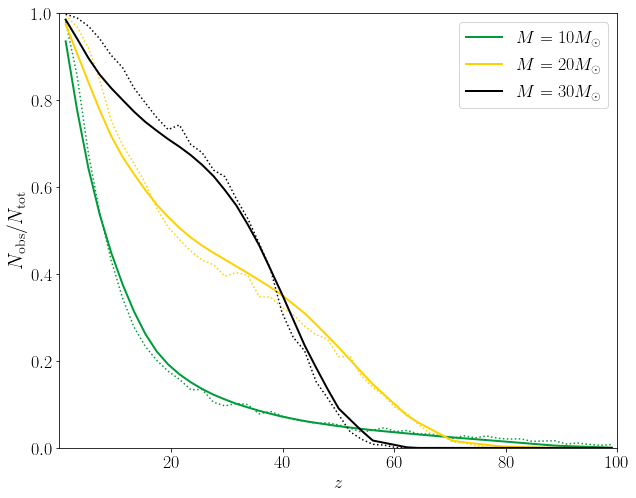

In [22]:
plt.figure(figsize=(10, 8))
for ind,m, in enumerate(mass_vec):
    plt.plot(midbins, internal_method[ind], lw=2, color=colors[ind],label=r'$M={:.0f}M_\odot$'.format(m))
    plt.plot(midbins,lensed_results[ind],color=colors[ind],ls=':')
plt.ylabel(r'$N_{\rm obs}/N_{\rm tot}$',fontsize = 20)
plt.xlabel(r'$z$')
plt.xlim(0.001,100)
plt.ylim(0,1)
plt.legend(loc='upper right');